## HR Analytics Project

Attrition has always been a major concern in any organization. The time, money and effort invested in training new employees, the work dependency and other factors leads to a massive overall loss to the firm when an employee leaves. Also, attrition causes distrust among existing employees which can itself become a major difficulty for the management of the organization.
The IBM HR Attrition Case Study is a fictional dataset which aims to identify important factors that might be influential in determining which employee might leave the firm and who may not. This article provides in-depth analysis as well as predictive modelling to understand important factors and make accurate predictions.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings

In [2]:
df = pd.read_csv('E:/Study/HR.csv')
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [3]:
df.shape

(1470, 35)

In [4]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

### EDA

In [6]:
df.isnull().any()

Age                         False
Attrition                   False
BusinessTravel              False
DailyRate                   False
Department                  False
DistanceFromHome            False
Education                   False
EducationField              False
EmployeeCount               False
EmployeeNumber              False
EnvironmentSatisfaction     False
Gender                      False
HourlyRate                  False
JobInvolvement              False
JobLevel                    False
JobRole                     False
JobSatisfaction             False
MaritalStatus               False
MonthlyIncome               False
MonthlyRate                 False
NumCompaniesWorked          False
Over18                      False
OverTime                    False
PercentSalaryHike           False
PerformanceRating           False
RelationshipSatisfaction    False
StandardHours               False
StockOptionLevel            False
TotalWorkingYears           False
TrainingTimesL

In [7]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [8]:
df.fillna(0,inplace=True)

<AxesSubplot:>

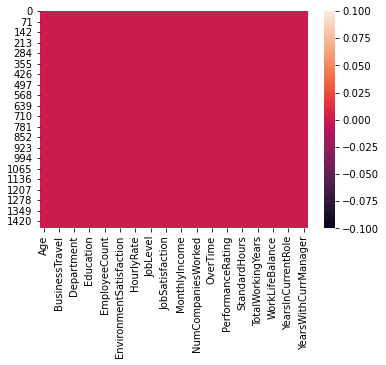

In [9]:
sns.heatmap(df.isnull())

In [10]:
df['EnvironmentSatisfaction'].nunique()

4

In [11]:
df.EnvironmentSatisfaction.value_counts()

3    453
4    446
2    287
1    284
Name: EnvironmentSatisfaction, dtype: int64

In [12]:
df['WorkLifeBalance'].value_counts()

3    893
2    344
4    153
1     80
Name: WorkLifeBalance, dtype: int64

### Visualization

<AxesSubplot:title={'center':'Age vs Attrition'}, xlabel='Age', ylabel='Attrition'>

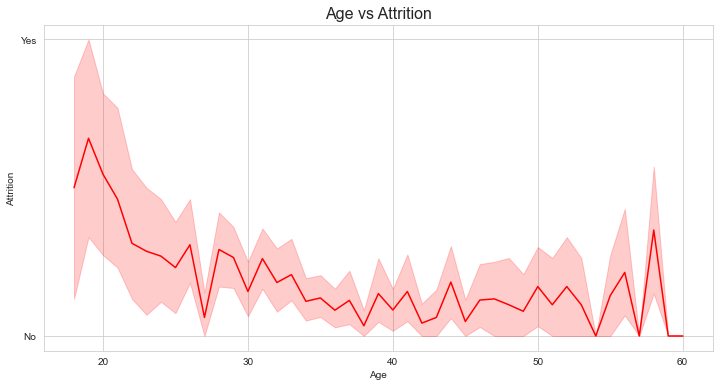

In [13]:
sns.set_style('whitegrid')
plt.figure(figsize=(12,6))
plt.title('Age vs Attrition',fontsize=16)
sns.lineplot(x='Age',y='Attrition',data=df,color='red')
# Attrition can be seen more in age groups between 18-25 

<Figure size 648x360 with 0 Axes>

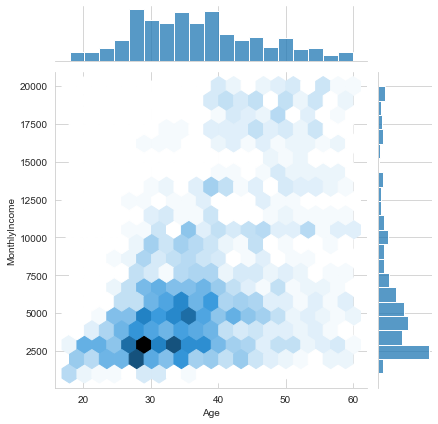

In [14]:
plt.figure(figsize=(9,5))
sns.jointplot(x='Age',y='MonthlyIncome',data=df,kind='hex')

<AxesSubplot:title={'center':'Marital Status vs Count (hue=Attrition)'}, xlabel='MaritalStatus', ylabel='count'>

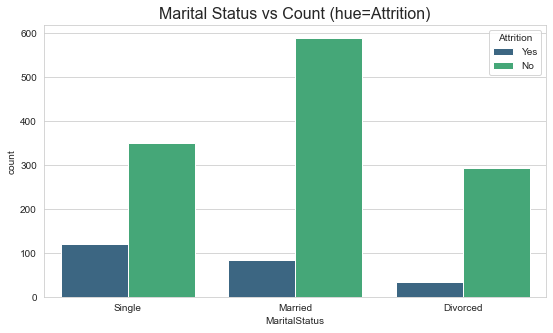

In [15]:
plt.figure(figsize=(9,5))
plt.title('Marital Status vs Count (hue=Attrition)',fontsize=16)
sns.countplot(x='MaritalStatus',hue='Attrition',data=df,palette='viridis')

<AxesSubplot:title={'center':'Marital Status vs Monthly Income'}, xlabel='MaritalStatus', ylabel='MonthlyIncome'>

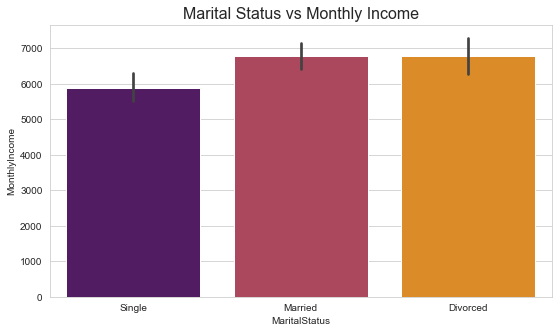

In [16]:
plt.figure(figsize=(9,5))
plt.title('Marital Status vs Monthly Income',fontsize=16)
sns.barplot(x='MaritalStatus',y='MonthlyIncome',data=df,palette='inferno')

<AxesSubplot:title={'center':'Attrition based on Gender'}, xlabel='Attrition', ylabel='count'>

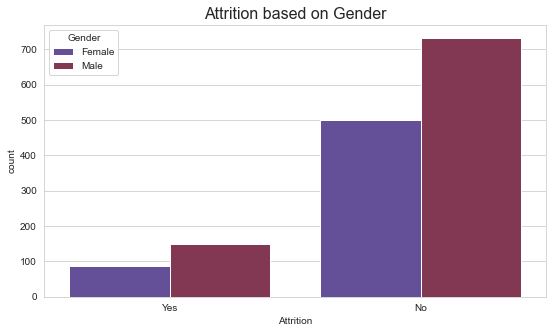

In [17]:
plt.figure(figsize=(9,5))
plt.title('Attrition based on Gender',fontsize=16)
sns.countplot(x='Attrition',hue='Gender',data=df,palette='twilight')

<AxesSubplot:title={'center':'Attrition based on Education Fields'}, xlabel='Attrition', ylabel='count'>

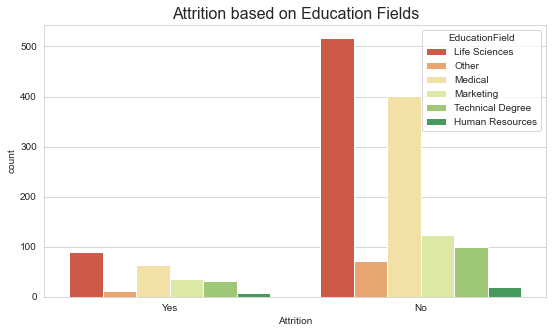

In [18]:
plt.figure(figsize=(9,5))
plt.title('Attrition based on Education Fields',fontsize=16)
sns.countplot(x='Attrition',hue='EducationField',data= df,palette='RdYlGn')

In [19]:
df.EmployeeCount.value_counts()

1    1470
Name: EmployeeCount, dtype: int64

<AxesSubplot:title={'center':'Attrition based on Job Level'}, xlabel='Attrition', ylabel='count'>

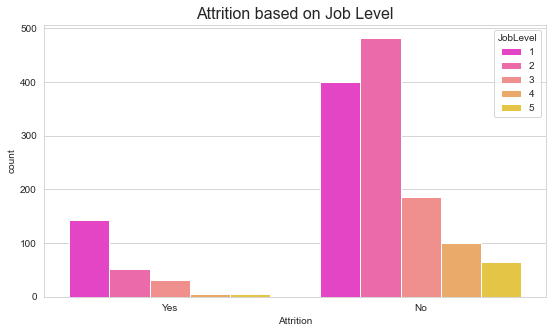

In [20]:
plt.figure(figsize=(9,5))
plt.title('Attrition based on Job Level',fontsize=16)
sns.countplot(x='Attrition',hue='JobLevel',data=df,palette='spring')

<AxesSubplot:title={'center':'Job Level vs Monthly Income'}, xlabel='JobLevel', ylabel='MonthlyIncome'>

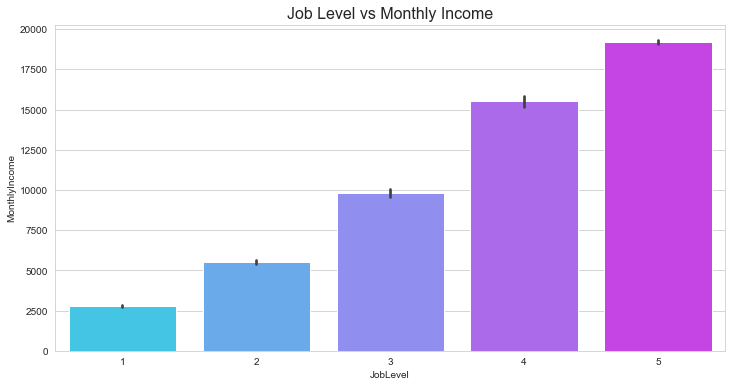

In [21]:
plt.figure(figsize=(12,6))
plt.title('Job Level vs Monthly Income',fontsize=16)
sns.barplot(x='JobLevel',y='MonthlyIncome',data=df,palette='cool')

<AxesSubplot:xlabel='Attrition', ylabel='count'>

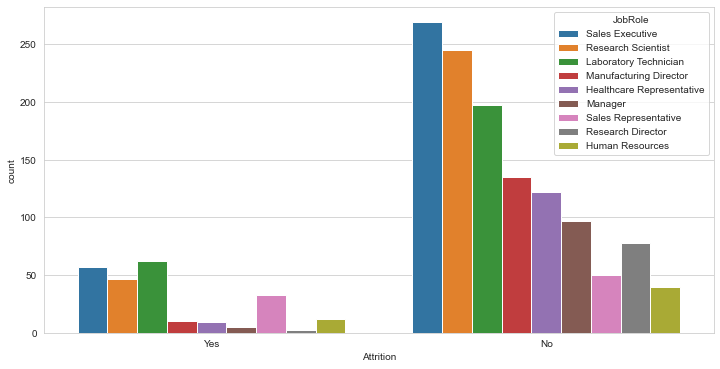

In [22]:
plt.figure(figsize=(12,6))
sns.countplot(x='Attrition',hue='JobRole',data=df)

<AxesSubplot:xlabel='YearsAtCompany', ylabel='count'>

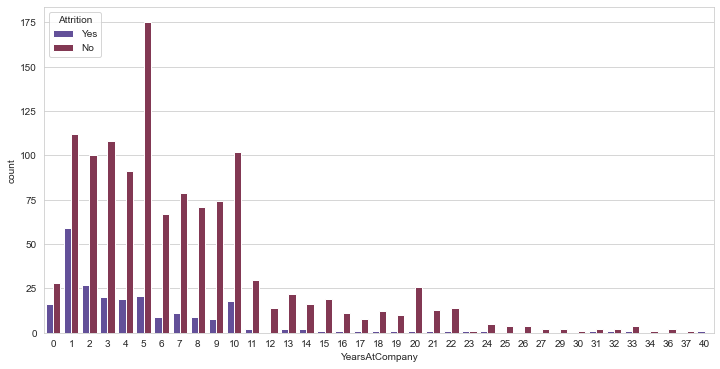

In [23]:
plt.figure(figsize=(12,6))
sns.countplot(x='YearsAtCompany',hue='Attrition',data=df,palette='twilight')

<AxesSubplot:xlabel='YearsSinceLastPromotion', ylabel='count'>

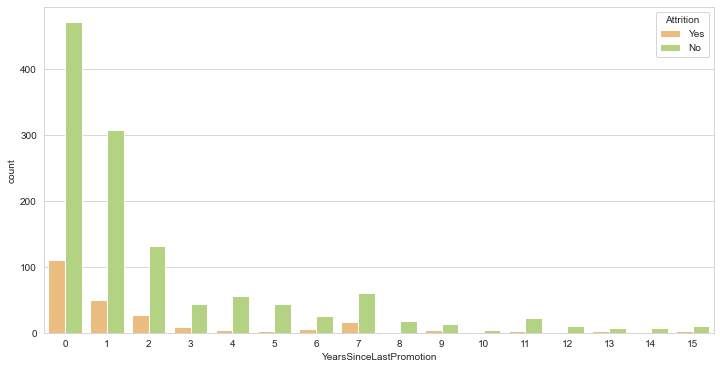

In [24]:
plt.figure(figsize=(12,6))
sns.countplot(x='YearsSinceLastPromotion',hue='Attrition',data=df,palette='RdYlGn')

In [25]:
df.TrainingTimesLastYear.value_counts() 

2    547
3    491
4    123
5    119
1     71
6     65
0     54
Name: TrainingTimesLastYear, dtype: int64

<AxesSubplot:xlabel='TrainingTimesLastYear', ylabel='count'>

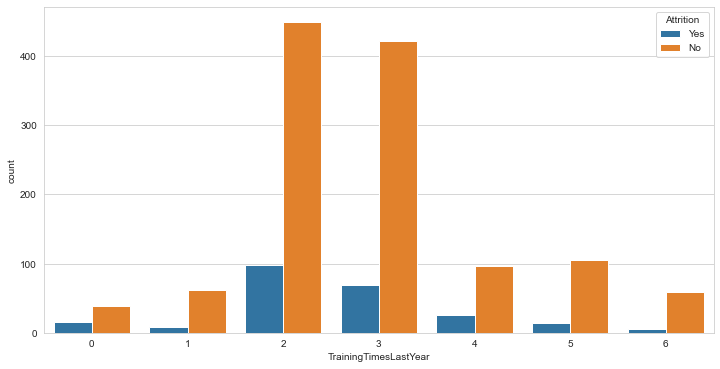

In [26]:
plt.figure(figsize=(12,6))
sns.countplot(x='TrainingTimesLastYear',hue='Attrition',data=df)

In [27]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


Thre are few variables which are represented as numerical but they are actually ordered categorical variables i.e. Education, EnvironmentSatisfaction, JobInvolvement, JobLevel, JobSatisfaction, PerformanceRating, RelationshipSatisfaction, WorkLifeBalance, StockOptionLevel

EmployeeNumber can be removed as it is an unique representation of Employee and doesn't have any significance with attrition.

EmployeCount has only 1 value which again won't help in our prediction model.

StandardHours has only one value which is 80, again won't help in our prediction model.

In [28]:
df.describe(include=[np.object])

<ipython-input-28-554b7518cb2b>:1: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  df.describe(include=[np.object])


,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
count,1470,1470,1470,1470,1470,1470,1470,1470,1470
unique,2,3,3,6,2,9,3,1,2
top,No,Travel_Rarely,Research & Development,Life Sciences,Male,Sales Executive,Married,Y,No
freq,1233,1043,961,606,882,326,673,1470,1054


Over18 has only one unique value which represents all employees are above 18 years of age. So, ideally this feature also has no variation adn won't help in our prediction mod

#### Attrition target Variable Distribution

     Attrition  frequency_percent
No        1233              83.88
Yes        237              16.12


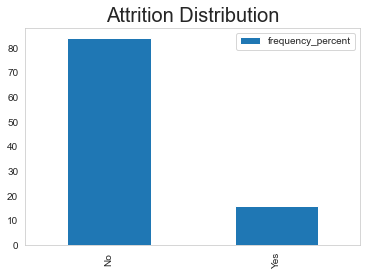

In [29]:
attrition_freq = df[['Attrition']].apply(lambda x: x.value_counts())
attrition_freq['frequency_percent'] = round((100 * attrition_freq / attrition_freq.sum()),2)

print(attrition_freq)

# Attrition distribution bar plot
plot = attrition_freq[['frequency_percent']].plot(kind="bar");
plot.set_title("Attrition Distribution", fontsize=20);
plot.grid(color='lightgray', alpha=0.5);

#### Exploratory Data Analysis - Categorical Features

In [30]:
emp_viz_df = df.copy() # Copy cleaned dataset for EDA & feature changes

# Let's add 2 features for EDA: Employee left and not left
emp_viz_df['Attrition_Yes'] = emp_viz_df['Attrition'].map({'Yes':1, 'No':0}) # 1 means Employee Left
emp_viz_df['Attrition_No'] = emp_viz_df['Attrition'].map({'Yes':0, 'No':1}) # 1 means Employee didnt leave

# Let's look into the new dataset and identify features for which plots needs to be build for categorical features
emp_viz_df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition_Yes,Attrition_No
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,0,8,0,1,6,4,0,5,1,0
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,1,10,3,3,10,7,1,7,0,1
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,0,7,3,3,0,0,0,0,1,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,0,8,3,3,8,7,3,0,0,1
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,1,6,3,3,2,2,2,2,0,1


In [31]:
cat_col_names = emp_viz_df.select_dtypes(include=[np.object]).columns.tolist() # Get categorical feature names
cat_col_names

<ipython-input-31-31ee1a9af91f>:1: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  cat_col_names = emp_viz_df.select_dtypes(include=[np.object]).columns.tolist() # Get categorical feature names


['Attrition',
 'BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus',
 'Over18',
 'OverTime']

In [32]:
def generate_frequency_graph(col_name):
    
    # Plotting of Employee Attrition against feature
    temp_grp = emp_viz_df.groupby(col_name).agg('sum')[['Attrition_Yes', 'Attrition_No']]
    temp_grp['Percentage Attrition'] =  temp_grp['Attrition_Yes'] / (temp_grp['Attrition_Yes'] + temp_grp['Attrition_No']) * 100
    print(temp_grp)
    emp_viz_df.groupby(col_name).agg('sum')[['Attrition_Yes', 'Attrition_No']].plot(kind='bar', stacked=False, color=['blue', 'gray'])
    plt.xlabel(col_name)
    plt.ylabel('Attrition');

                   Attrition_Yes  Attrition_No  Percentage Attrition
BusinessTravel                                                      
Non-Travel                    12           138              8.000000
Travel_Frequently             69           208             24.909747
Travel_Rarely                156           887             14.956855


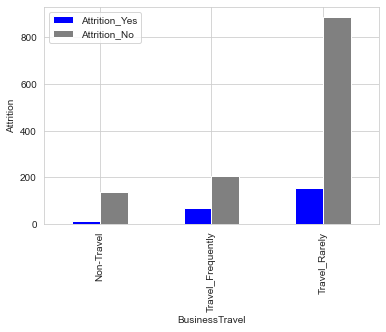

In [33]:
# Plotting of Employee Attrition against Business Travel feature
generate_frequency_graph('BusinessTravel')
# We can see Employee Attrition rate of Travel Frequently is high, then Travel Rarely & then Non-Travel

                        Attrition_Yes  Attrition_No  Percentage Attrition
Department                                                               
Human Resources                    12            51             19.047619
Research & Development            133           828             13.839750
Sales                              92           354             20.627803


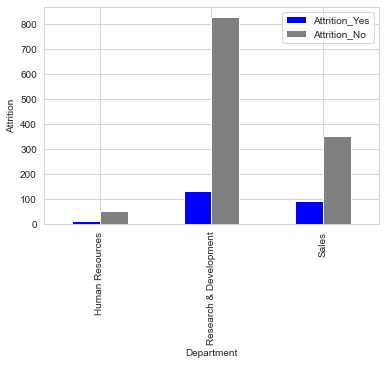

In [34]:
# Plotting of Employee Attrition against Department feature
generate_frequency_graph('Department')
# We can see Employee Attrition rate for Sales department is high then HR and finally Research & Development

        Attrition_Yes  Attrition_No  Percentage Attrition
Gender                                                   
Female             87           501             14.795918
Male              150           732             17.006803


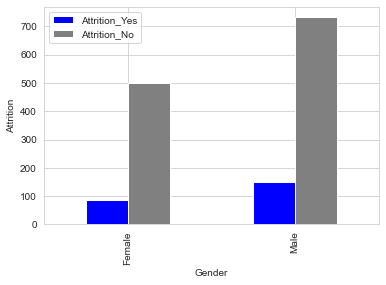

In [35]:
# Plotting of Employee Attrition against Gender feature
generate_frequency_graph('Gender')
# We can see Employee Attrition rate for Male is higher than Female

               Attrition_Yes  Attrition_No  Percentage Attrition
MaritalStatus                                                   
Divorced                  33           294             10.091743
Married                   84           589             12.481426
Single                   120           350             25.531915


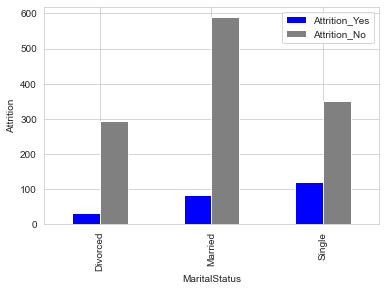

In [36]:
# Plotting of Employee Attrition against MaritalStatus feature
generate_frequency_graph('MaritalStatus')
# We can see Employee Attrition rate for Single is higher than any other.

          Attrition_Yes  Attrition_No  Percentage Attrition
OverTime                                                   
No                  110           944             10.436433
Yes                 127           289             30.528846


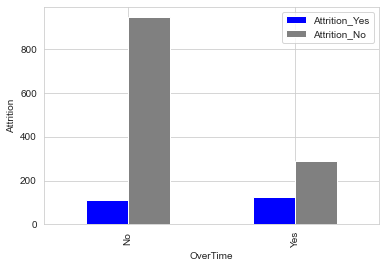

In [37]:
# Plotting of Employee Attrition against Overtime
generate_frequency_graph('OverTime')
# It is obivious that employee who are doing overtime has higher attrition rate

                  Attrition_Yes  Attrition_No  Percentage Attrition
EducationField                                                     
Human Resources               7            20             25.925926
Life Sciences                89           517             14.686469
Marketing                    35           124             22.012579
Medical                      63           401             13.577586
Other                        11            71             13.414634
Technical Degree             32           100             24.242424


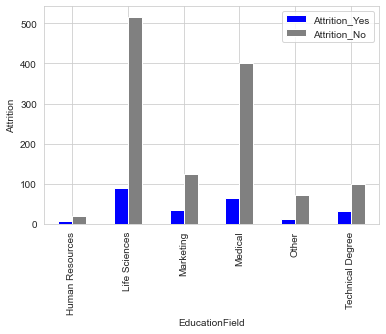

In [38]:
# Plotting of Employee Attrition against Education field
generate_frequency_graph('EducationField')

                           Attrition_Yes  Attrition_No  Percentage Attrition
JobRole                                                                     
Healthcare Representative              9           122              6.870229
Human Resources                       12            40             23.076923
Laboratory Technician                 62           197             23.938224
Manager                                5            97              4.901961
Manufacturing Director                10           135              6.896552
Research Director                      2            78              2.500000
Research Scientist                    47           245             16.095890
Sales Executive                       57           269             17.484663
Sales Representative                  33            50             39.759036


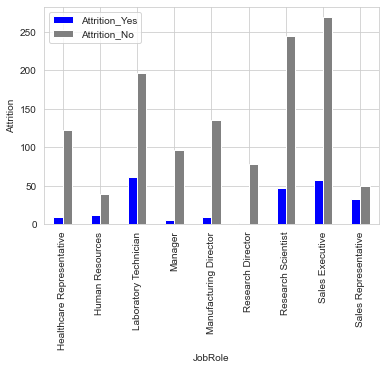

In [39]:
# Plotting of Employee Attrition against Job role
generate_frequency_graph('JobRole')


#### Exploratory Data Analysis - Ordered Categorical Features

           Attrition_Yes  Attrition_No  Percentage Attrition
Education                                                   
1                     31           139             18.235294
2                     44           238             15.602837
3                     99           473             17.307692
4                     58           340             14.572864
5                      5            43             10.416667


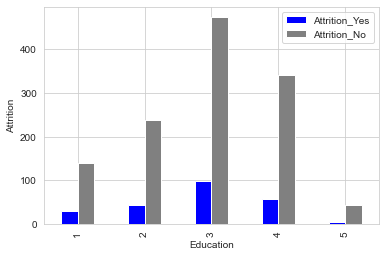

In [40]:
# Plotting of Employee Attrition against Education feature
# 1-Below College, 2-College, 3-Bachelor, 4-Master, 5-Doctor
generate_frequency_graph('Education')
# We can see Employee Attrition rate is high for Below College & Bachelor

                 Attrition_Yes  Attrition_No  Percentage Attrition
JobSatisfaction                                                   
1                           66           223             22.837370
2                           46           234             16.428571
3                           73           369             16.515837
4                           52           407             11.328976


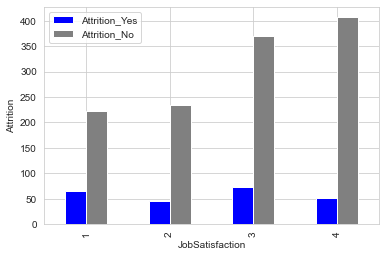

In [41]:
# Plotting of Employee Attrition against Education feature
# 1-Low, 2-Medium, 3-High, 4-Very High
generate_frequency_graph('JobSatisfaction')
# Attrition is directly proportional to JobSatisfaction

                 Attrition_Yes  Attrition_No  Percentage Attrition
WorkLifeBalance                                                   
1                           25            55             31.250000
2                           58           286             16.860465
3                          127           766             14.221725
4                           27           126             17.647059


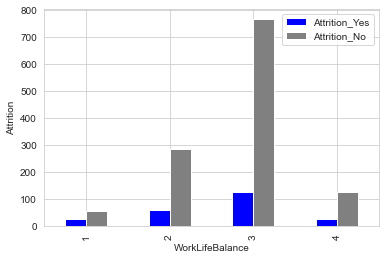

In [42]:
# Plotting of Employee Attrition against Education feature
# 1-Bad, 2-Good, 3-Better, 4-Best
generate_frequency_graph('WorkLifeBalance')
# Attrition rate of Bad work life balance is high, however attrition rate of Best is higher than Good

We can look into other ordered categorical features like EnvironmentSatisfaction, JobInvolvement, PerformanceRating, RelationshipSatisfaction the same way and draw inferences which can help us to create new features for our model or which features we need to select for our model.

#### Exploratory Data Analysis - Numerical Features

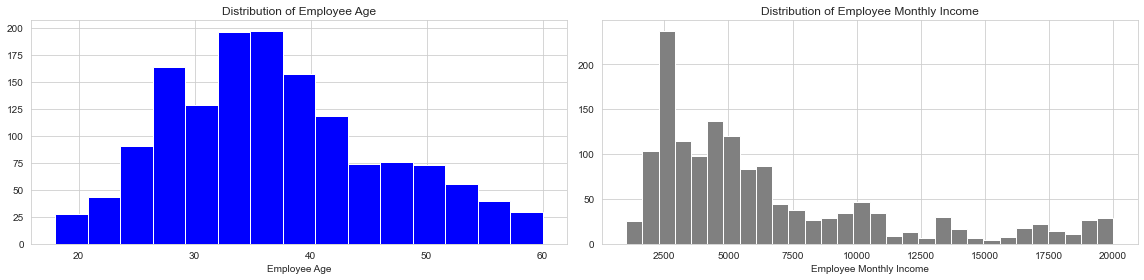

In [43]:
fig = plt.figure(figsize=(16,4))

# Histogram Plot for Employee Age
plt.subplot(1,2,1)
plt.hist(emp_viz_df['Age'], bins=15, color='blue')
plt.title('Distribution of Employee Age')
plt.xlabel("Employee Age")

# Histogram Plot for employee Monthly Income
plt.subplot(1,2,2)
plt.hist(emp_viz_df['MonthlyIncome'], bins=30, color='gray')
plt.title('Distribution of Employee Monthly Income')
plt.xlabel("Employee Monthly Income")

fig.tight_layout();


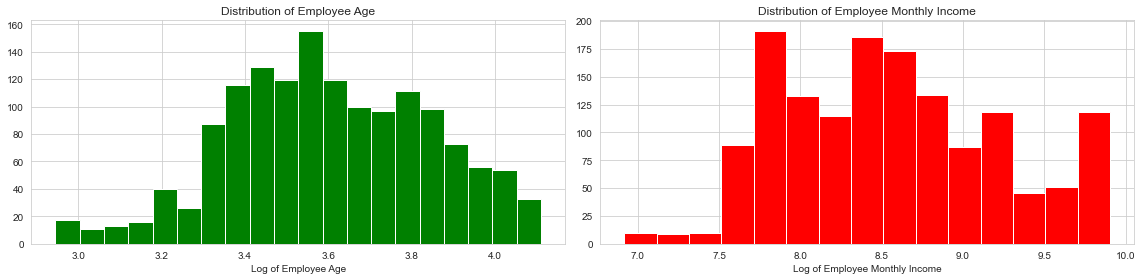

In [44]:
fig = plt.figure(figsize=(16,4))

# Histogram Plot for Employee Age
plt.subplot(1,2,1)
plt.hist(np.log1p(emp_viz_df['Age']), bins=20, color='green')
plt.title('Distribution of Employee Age')
plt.xlabel("Log of Employee Age")

# Histogram Plot for employee Monthly Income
plt.subplot(1,2,2)
plt.hist(np.log1p(emp_viz_df['MonthlyIncome']), bins=15, color='red')
plt.title('Distribution of Employee Monthly Income')
plt.xlabel("Log of Employee Monthly Income")

fig.tight_layout();

In [45]:
print('Skewness in employee Age feature: ', emp_viz_df['Age'].skew())
print('Skewness in employee Monthly Income feature: ', emp_viz_df['MonthlyIncome'].skew())

Skewness in employee Age feature:  0.4132863018563338
Skewness in employee Monthly Income feature:  1.3698166808390662


We can observe above that without log transformation, "Age" feature looks normally distributed more than "MonthlyIncome" feature.
Hence, after log transformation, there is hardly any change in "Age" distributions but there is significant transformation in "MonthlyIncome" feature.
This can also be confirmed by checking the skewness of each feature by applying numpy skew metric and higher the skewness, higher the value.
So, we will use some threshold value of skewness to carry out log transformation on features with high skewness.

#### Adding new features
Adding new features can have impact on Outcome so lets try to add some.

In [46]:
emp_proc_df = df.copy() # Copy cleaned dataset for feature engineering

emp_proc_df['TenurePerJob'] = 0

for i in range(0, len(emp_proc_df)):
    if emp_proc_df.loc[i,'NumCompaniesWorked'] > 0:
        emp_proc_df.loc[i,'TenurePerJob'] = emp_proc_df.loc[i,'TotalWorkingYears'] / emp_proc_df.loc[i,'NumCompaniesWorked']

emp_proc_df['YearWithoutChange1'] = emp_proc_df['YearsInCurrentRole'] - emp_proc_df['YearsSinceLastPromotion']
emp_proc_df['YearWithoutChange2'] = emp_proc_df['TotalWorkingYears'] - emp_proc_df['YearsSinceLastPromotion']

monthly_income_median = np.median(emp_proc_df['MonthlyIncome'])
emp_proc_df['CompRatioOverall'] = emp_proc_df['MonthlyIncome'] / monthly_income_median

print('Dataset dimension: {} rows, {} columns'.format(emp_proc_df.shape[0], emp_proc_df.shape[1]))

Dataset dimension: 1470 rows, 39 columns


#### Remove Unnecessary Observations
We need to remove EmployeeNumber, EmployeeCount, StandardHours & Over18 which doesn't have any significance on attrition. We made this inference at the top while describing dataset.

In [47]:
# Features to remove
feat_to_remove = ['EmployeeNumber', 'EmployeeCount', 'Over18', 'StandardHours']

emp_proc_df.drop( feat_to_remove , axis = 1, inplace = True )
print('Dataset dimension: {} rows, {} columns'.format(emp_proc_df.shape[0], emp_proc_df.shape[1]))

Dataset dimension: 1470 rows, 35 columns


In [48]:
full_col_names = emp_proc_df.columns.tolist()
num_col_names = emp_proc_df.select_dtypes(include=[np.int64,np.float64]).columns.tolist() # Get numerical feature names

# Preparing list of ordered categorical features
num_cat_col_names = ['Education', 'EnvironmentSatisfaction', 'JobInvolvement', 'JobLevel', 'JobSatisfaction',
                     'PerformanceRating', 'RelationshipSatisfaction', 'WorkLifeBalance', 'StockOptionLevel']

target = ['Attrition']

num_col_names = list(set(num_col_names) - set(num_cat_col_names)) # Numerical features w/o Ordered Categorical features
cat_col_names = list(set(full_col_names) - set(num_col_names) - set(target)) # Categorical & Ordered Categorical features

print('Total number of numerical features: ', len(num_col_names))
print('Total number of categorical & ordered categorical features: ', len(cat_col_names))

cat_emp_df = emp_proc_df[cat_col_names]
num_emp_df = emp_proc_df[num_col_names]

Total number of numerical features:  18
Total number of categorical & ordered categorical features:  16


In [49]:
# Let's create dummy variables for each categorical attribute for training our calssification model
for col in num_col_names:
    if num_emp_df[col].skew() > 0.80:
        num_emp_df[col] = np.log1p(num_emp_df[col])

num_emp_df.head()

<ipython-input-49-5ea1d4828d2b>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  num_emp_df[col] = np.log1p(num_emp_df[col])


,Age,YearsSinceLastPromotion,TotalWorkingYears,TenurePerJob,DistanceFromHome,MonthlyIncome,TrainingTimesLastYear,YearWithoutChange1,YearsInCurrentRole,YearsAtCompany,HourlyRate,NumCompaniesWorked,YearsWithCurrManager,PercentSalaryHike,DailyRate,YearWithoutChange2,MonthlyRate,CompRatioOverall
0,41,0.000000,2.197225,0.693147,0.693147,8.698514,0,4,1.609438,1.945910,94,2.197225,1.791759,2.484907,1102,2.197225,19479,0.796758
1,49,0.693147,2.397895,2.397895,2.197225,8.543056,3,6,2.079442,2.397895,61,0.693147,2.079442,3.178054,279,2.302585,24907,0.714368
2,37,0.000000,2.079442,0.773190,1.098612,7.645398,3,0,0.000000,0.000000,92,1.945910,0.000000,2.772589,1373,2.079442,2396,0.354090
3,33,1.386294,2.197225,2.197225,1.386294,7.975908,3,4,2.079442,2.197225,56,0.693147,0.000000,2.484907,1392,1.791759,23159,0.464602
4,27,1.098612,1.945910,0.510826,1.098612,8.151622,3,0,1.098612,1.098612,40,2.302585,1.098612,2.564949,591,1.609438,16632,0.533578


#### Transforming categorical features

In [50]:
for col in cat_col_names:
    col_dummies = pd.get_dummies(cat_emp_df[col], prefix=col)
    cat_emp_df = pd.concat([cat_emp_df, col_dummies], axis=1)

# Use the pandas apply method to numerically encode our attrition target variable
attrition_target = emp_proc_df['Attrition'].map({'Yes':1, 'No':0})

# Drop categorical feature for which dummy variables have been created
cat_emp_df.drop(cat_col_names, axis=1, inplace=True)

cat_emp_df.head()

,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,RelationshipSatisfaction_1,...,OverTime_No,OverTime_Yes,WorkLifeBalance_1,WorkLifeBalance_2,WorkLifeBalance_3,WorkLifeBalance_4,EnvironmentSatisfaction_1,EnvironmentSatisfaction_2,EnvironmentSatisfaction_3,EnvironmentSatisfaction_4
0,0,0,0,0,0,0,0,1,0,1,...,0,1,1,0,0,0,0,1,0,0
1,0,0,0,0,0,0,1,0,0,0,...,1,0,0,0,1,0,0,0,1,0
2,0,0,1,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,1
3,0,0,0,0,0,0,1,0,0,0,...,0,1,0,0,1,0,0,0,0,1
4,0,0,1,0,0,0,0,0,0,0,...,1,0,0,0,1,0,1,0,0,0


#### Correlation of Numerical data against Attrition

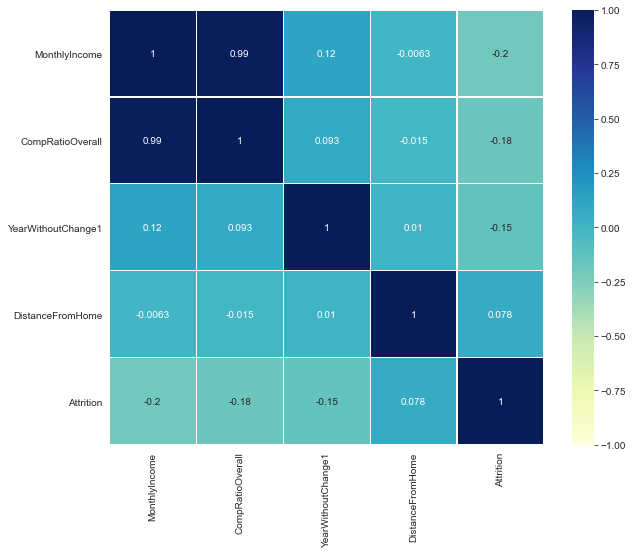

In [51]:
num_corr_df = num_emp_df[['MonthlyIncome', 'CompRatioOverall', 'YearWithoutChange1', 'DistanceFromHome']]
corr_df = pd.concat([num_corr_df, attrition_target], axis=1)
corr = corr_df.corr()

plt.figure(figsize = (10, 8))
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
sns.axes_style("white")
#sns.heatmap(data=corr, annot=True, mask=mask, square=True, linewidths=.5, vmin=-1, vmax=1, cmap="YlGnBu")
sns.heatmap(data=corr, annot=True, square=True, linewidths=.5, vmin=-1, vmax=1, cmap="YlGnBu")
plt.show()

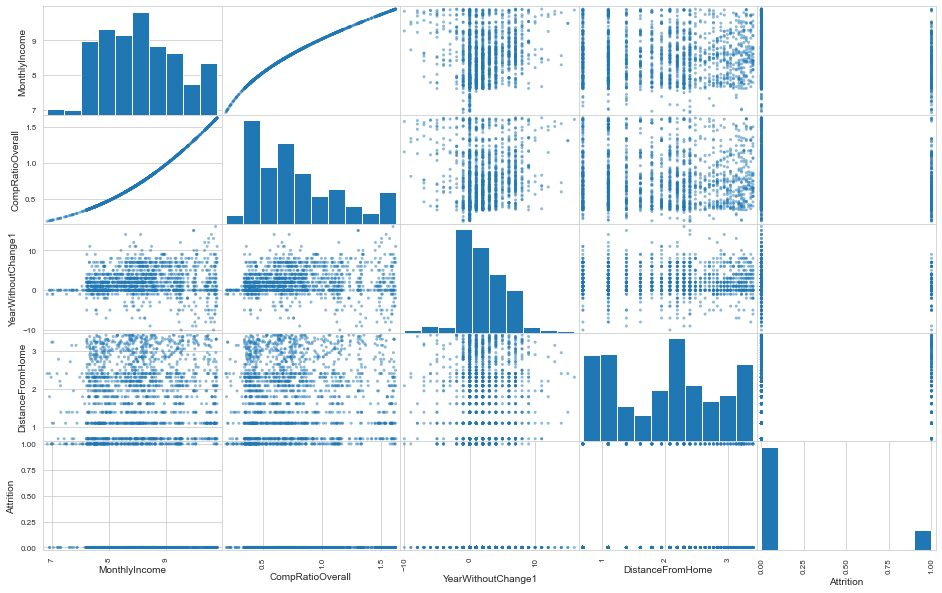

In [52]:
from pandas.plotting import scatter_matrix

scatter_matrix(corr_df, figsize=(16, 10));


In [53]:
# Concat the two dataframes together columnwise
final_emp_df = pd.concat([num_emp_df, cat_emp_df], axis=1)

print('Dataset dimension after treating categorical features with dummy variables: {} rows, {} columns'.format(final_emp_df.shape[0], final_emp_df.shape[1]))
final_emp_df.head()

Dataset dimension after treating categorical features with dummy variables: 1470 rows, 82 columns


,Age,YearsSinceLastPromotion,TotalWorkingYears,TenurePerJob,DistanceFromHome,MonthlyIncome,TrainingTimesLastYear,YearWithoutChange1,YearsInCurrentRole,YearsAtCompany,...,OverTime_No,OverTime_Yes,WorkLifeBalance_1,WorkLifeBalance_2,WorkLifeBalance_3,WorkLifeBalance_4,EnvironmentSatisfaction_1,EnvironmentSatisfaction_2,EnvironmentSatisfaction_3,EnvironmentSatisfaction_4
0,41,0.000000,2.197225,0.693147,0.693147,8.698514,0,4,1.609438,1.945910,...,0,1,1,0,0,0,0,1,0,0
1,49,0.693147,2.397895,2.397895,2.197225,8.543056,3,6,2.079442,2.397895,...,1,0,0,0,1,0,0,0,1,0
2,37,0.000000,2.079442,0.773190,1.098612,7.645398,3,0,0.000000,0.000000,...,0,1,0,0,1,0,0,0,0,1
3,33,1.386294,2.197225,2.197225,1.386294,7.975908,3,4,2.079442,2.197225,...,0,1,0,0,1,0,0,0,0,1
4,27,1.098612,1.945910,0.510826,1.098612,8.151622,3,0,1.098612,1.098612,...,1,0,0,0,1,0,1,0,0,0


#### Model Building and variation

In [54]:
# Import the train_test_split method
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit

# Split data into train and test sets as well as for validation and testing
X_train, X_test, y_train, y_test = train_test_split(final_emp_df, attrition_target,
                                                  test_size= 0.30, random_state=42);

print("Stratified Sampling: ", len(X_train), "train set +", len(X_test), "validation set")

Stratified Sampling:  1029 train set + 441 validation set


In [55]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectFromModel

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, f1_score

In [56]:
def gen_model_performance(actual_target, pred_target):
    model_conf_matrix = confusion_matrix(actual_target, pred_target)
    model_roc_score = roc_auc_score(actual_target, pred_target)
    model_accuracy = accuracy_score(actual_target, pred_target) * 100.0
    
    TP = model_conf_matrix[1][1]; TN = model_conf_matrix[0][0]; 
    FP = model_conf_matrix[0][1]; FN = model_conf_matrix[1][0];
    sensitivity = TP / float(TP + FN) * 100.0; specificity = TN / float(TN + FP) * 100.0;
    precision = TP / float(TP + FP) * 100.0;
    
    return sensitivity, specificity, model_accuracy, precision, model_roc_score

In [57]:
def evaluate_model_score(X, y, scoring='accuracy'):
    
    logreg_model = LogisticRegression(random_state=0)
    logreg_cv_model = LogisticRegressionCV()
    rfc_model = RandomForestClassifier()
    extrees_model = ExtraTreesClassifier()
    gboost_model = GradientBoostingClassifier()
    dt_model = DecisionTreeClassifier()
    aboost_model = AdaBoostClassifier()
    gnb_model = GaussianNB()

    models = [logreg_model, logreg_cv_model, dt_model, rfc_model, 
              extrees_model, gboost_model, aboost_model, gnb_model]
    
    model_results = pd.DataFrame(columns = ["Model", "Accuracy", "Precision", "CV Score",
                                            "Sensitivity","Specificity","ROC Score"])
    
    for model in models:
        model.fit(X, y,)
        y_pred = model.predict(X)
        score = cross_val_score(model, X, y, cv=5, scoring=scoring)
        
        sensitivity, specificity, accuracy, precision, roc_score = gen_model_performance(y, y_pred)
    
        scores = cross_val_score(model, X, y, cv=5)
    
        model_results = model_results.append({"Model": model.__class__.__name__,
                              "Accuracy": accuracy, "Precision": precision,
                              "CV Score": scores.mean()*100.0,
                              "Sensitivity": sensitivity, "Specificity": specificity,
                              "ROC Score": roc_score}, ignore_index=True)
    return model_results

In [58]:
model_results = evaluate_model_score(X_train, y_train)

model_results

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

,Model,Accuracy,Precision,CV Score,Sensitivity,Specificity,ROC Score
0,LogisticRegression,86.005831,70.000000,85.128582,31.818182,97.186401,0.645023
1,LogisticRegressionCV,88.726919,91.666667,88.531849,37.500000,99.296600,0.683983
2,DecisionTreeClassifier,100.000000,100.000000,78.620412,100.000000,100.000000,1.000000
3,RandomForestClassifier,100.000000,100.000000,85.033862,100.000000,100.000000,1.000000
4,ExtraTreesClassifier,100.000000,100.000000,86.394033,100.000000,100.000000,1.000000
5,GradientBoostingClassifier,96.209913,100.000000,85.323704,77.840909,100.000000,0.889205
6,AdaBoostClassifier,90.573372,84.955752,87.075065,54.545455,98.007034,0.762762
7,GaussianNB,76.287658,39.696970,76.194648,74.431818,76.670574,0.755512


In [59]:
rfc_model = RandomForestClassifier();

refclasscol = X_train.columns

# fit random forest classifier on the training set
rfc_model.fit(X_train, y_train);

# extract important features
score = np.round(rfc_model.feature_importances_, 3)
importances = pd.DataFrame({'feature':refclasscol, 'importance':score})
importances = importances.sort_values('importance', ascending=False).set_index('feature')

# random forest classifier parameters used for feature importances
print(rfc_model)

# plot importances
#importances.plot.bar();
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

RandomForestClassifier()


RandomForestClassifier(n_estimators=10)

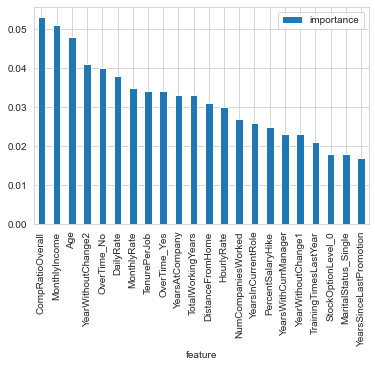

In [60]:
high_imp_df = importances[importances.importance>=0.015]
high_imp_df.plot.bar();
del high_imp_df

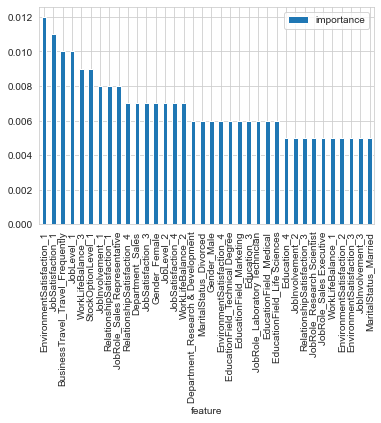

In [61]:
mid_imp_df = importances[importances.importance<=0.015]
mid_imp_df = mid_imp_df[mid_imp_df.importance>=0.0050]
mid_imp_df.plot.bar();
del mid_imp_df

In [62]:
selection = SelectFromModel(rfc_model, threshold = 0.002, prefit=True)

X_train_select = selection.transform(X_train)
X_val_select = selection.transform(X_test)

print('Train dataset dimension before Feature Selection: {} rows, {} columns'.format(X_train.shape[0], X_train.shape[1]))
print('Train dataset dimension after Feature Selection: {} rows, {} columns'.format(X_train_select.shape[0], X_train_select.shape[1]))

Train dataset dimension before Feature Selection: 1029 rows, 82 columns
Train dataset dimension after Feature Selection: 1029 rows, 74 columns


In [63]:
model_results = evaluate_model_score(X_train_select, y_train)

model_results

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

,Model,Accuracy,Precision,CV Score,Sensitivity,Specificity,ROC Score
0,LogisticRegression,83.770651,90.909091,85.132844,5.681818,99.882767,0.527823
1,LogisticRegressionCV,89.990282,79.674797,87.658063,55.681818,97.069168,0.763755
2,DecisionTreeClassifier,100.000000,100.000000,78.328203,100.000000,100.000000,1.000000
3,RandomForestClassifier,100.000000,100.000000,85.520246,100.000000,100.000000,1.000000
4,ExtraTreesClassifier,100.000000,100.000000,85.519299,100.000000,100.000000,1.000000
5,GradientBoostingClassifier,96.209913,100.000000,85.324651,77.840909,100.000000,0.889205
6,AdaBoostClassifier,90.281827,81.147541,86.782856,56.250000,97.303634,0.767768
7,GaussianNB,81.146744,46.484375,78.816008,67.613636,83.939039,0.757763


In [64]:
final_rfc_model = RandomForestClassifier()
final_rf_scores = cross_val_score(final_rfc_model, X_train_select, y_train, cv=5)

final_rfc_model.fit(X_train_select, y_train)
y_trn_pred = final_rfc_model.predict(X_train_select)
sensitivity, specificity, accuracy, precision, roc_score = gen_model_performance(y_train, y_trn_pred)

print("Train Accuracy: %.2f%%, Precision: %.2f%%, CV Mean Score=%.2f%%, Sensitivity=%.2f%%, Specificity=%.2f%%" % 
      (accuracy, precision, final_rf_scores.mean()*100.0, sensitivity, specificity))
print('***************************************************************************************\n')

y_val_pred = final_rfc_model.predict(X_val_select)
sensitivity, specificity, accuracy, precision, roc_score = gen_model_performance(y_test, y_val_pred)

print("Validation Accuracy: %.2f%%, Precision: %.2f%%, Sensitivity=%.2f%%, Specificity=%.2f%%" % 
      (accuracy, precision, sensitivity, specificity))
print('***************************************************************************************\n')

Train Accuracy: 100.00%, Precision: 100.00%, CV Mean Score=85.13%, Sensitivity=100.00%, Specificity=100.00%
***************************************************************************************

Validation Accuracy: 86.62%, Precision: 58.33%, Sensitivity=11.48%, Specificity=98.68%
***************************************************************************************



#### Identify Best Hyper-Parameters of Model

In [65]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV

# Hyperparameters Tuning for Random Forest
rfc_param_grid = {
                 'max_depth' : [None, 4, 6, 8],
                 'n_estimators': [10, 30, 50],
                 'max_features': ['sqrt', 'auto', 'log2'],
                 'min_samples_split': [2, 3, 10],
                 'min_samples_leaf': [1, 3, 10],
                 }
rfc_best_model = RandomForestClassifier()
rfc_cross_val = StratifiedKFold(n_splits=5)

rfc_grid_search = GridSearchCV(rfc_best_model,
                               scoring='accuracy',
                               param_grid=rfc_param_grid,
                               cv=rfc_cross_val,
                               verbose=1)

rfc_grid_search.fit(X_train_select, y_train)
rfc_model = rfc_grid_search
rfc_parameters = rfc_grid_search.best_params_

rfc_best_model = RandomForestClassifier(**rfc_parameters)

scores = cross_val_score(rfc_best_model, X_train_select, y_train, cv=5, scoring='accuracy')
    
print('Cross-validation of : {0}'.format(rfc_best_model.__class__))
print('After Hyperparameters tuning CV score = {0}'.format(np.mean(scores) * 100.0))
print('Best score: {}'.format(rfc_grid_search.best_score_))
print('Best parameters: {}'.format(rfc_grid_search.best_params_))

rfc_best_model.fit(X_train_select, y_train)
y_trn_pred = rfc_best_model.predict(X_train_select)
sensitivity, specificity, accuracy, precision, roc_score = gen_model_performance(y_train, y_trn_pred)

print("\nTrain Accuracy: %.2f%%, Precision: %.2f%%, CV Mean Score=%.2f%%, Sensitivity=%.2f%%, Specificity=%.2f%%" % 
      (accuracy, precision, scores.mean()*100.0, sensitivity, specificity))
print('***************************************************************************************\n')

Fitting 5 folds for each of 324 candidates, totalling 1620 fits
Cross-validation of : <class 'sklearn.ensemble._forest.RandomForestClassifier'>
After Hyperparameters tuning CV score = 85.32607151314231
Best score: 0.8600710395453468
Best parameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 30}

Train Accuracy: 99.71%, Precision: 100.00%, CV Mean Score=85.33%, Sensitivity=98.30%, Specificity=100.00%
***************************************************************************************



In [66]:
y_val_pred = rfc_best_model.predict(X_val_select)
sensitivity, specificity, accuracy, precision, roc_score = gen_model_performance(y_test, y_val_pred)

print("Validation Accuracy: %.2f%%, Precision: %.2f%%, Sensitivity=%.2f%%, Specificity=%.2f%%" % 
      (accuracy, precision, sensitivity, specificity))
print('***************************************************************************************\n')

Validation Accuracy: 85.94%, Precision: 46.15%, Sensitivity=9.84%, Specificity=98.16%
***************************************************************************************



### Conclusion

Random Forest Classifier showed the best results 

### Saving the Model

In [67]:
import pickle
filename='HR attrition.pkl'
pickle.dump(rfc_model,open(filename,'wb'))